<a href="https://colab.research.google.com/github/sp-au-mu-nl/SpeechComm/blob/main/notebook/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap04.zip
!unzip -o chap04.zip
!rm chap04.zip

--2025-04-23 03:57:24--  https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap04.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap04.zip [following]
--2025-04-23 03:57:25--  https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap04.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424592 (415K) [application/zip]
Saving to: ‘chap04.zip’

chap04.zip          100%[===================>] 414.64K  --.-KB/s    in 0.06s   

2025-04-23 03:57:25 (6.59 MB/s) - ‘chap04.zip’ saved [424592/424592]

Archive:  chap

プログラム 4.1

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import IPython.display

プログラム 4.2

(0.0, 50.0)

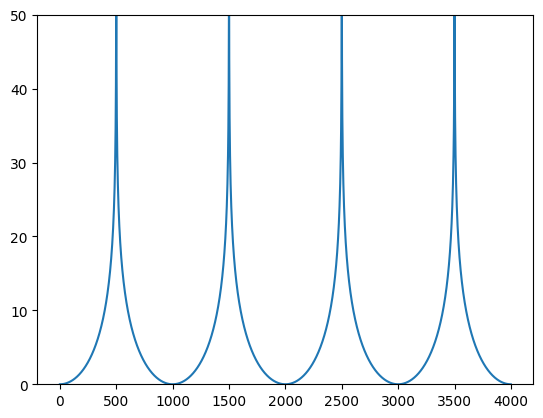

In [3]:
c = 340; length = 0.17; fs = 8000
frequency = np.arange(0,fs/2)
plt.plot(frequency, 20*np.log10(np.abs(1/np.cos(2*np.pi*frequency
                                                *length/c))))
plt.ylim(0,50)

プログラム 4.3

(0.0, 50.0)

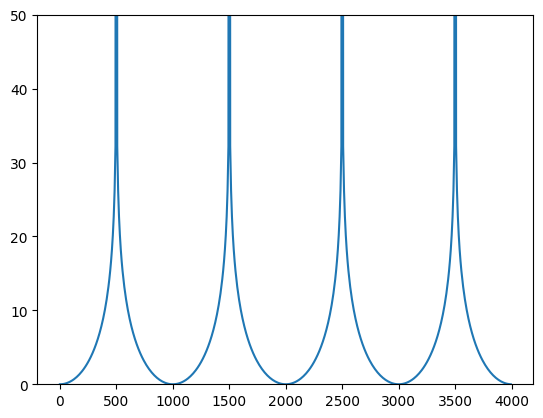

In [4]:
plt.close()
sr = 8000
b = np.zeros(5)
a = np.zeros(9)
b[4] = 2;
a[0] = 1; a[8] = 1
w, H = signal.freqz(b,a)
f = sr*w/(2*np.pi)
plt.plot(f,20*np.log10(np.abs(H)));
plt.ylim([0,50])

プログラム 4.9 (章末問題 3)

Text(0.5, 0, 'Time (s)')

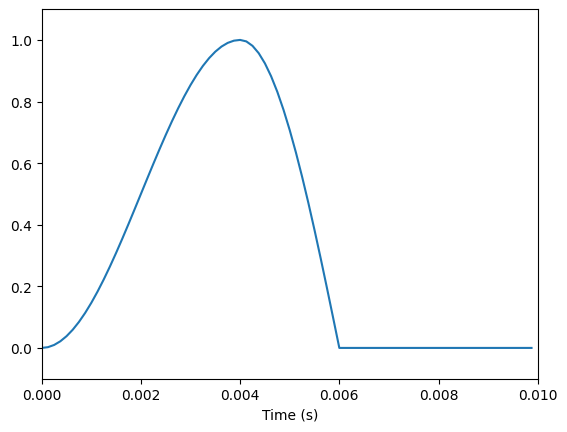

In [5]:
plt.close()
sr = 8000
T1 = 0.004
T2 = 0.002
t1 = np.arange(0,T1,1/sr)
g1 = 0.5*(1-np.cos(2*np.pi*t1/2/T1))
t2 = np.arange(T1,T1+T2,1/sr)
g2 = np.cos(2*np.pi*(t2-T1)/4/T2)
t3 = np.arange(T1+T2,0.01,1/sr)
g3 = np.zeros(t3.shape)
g = np.hstack((g1,g2,g3))
t = np.hstack((t1,t2,t3))
plt.plot(t,g)
plt.xlim([0,0.01])
plt.ylim([-.1,1.1])
plt.xlabel('Time (s)')

プログラム 4.4

Text(0.5, 0, 'Frequency (Hz)')

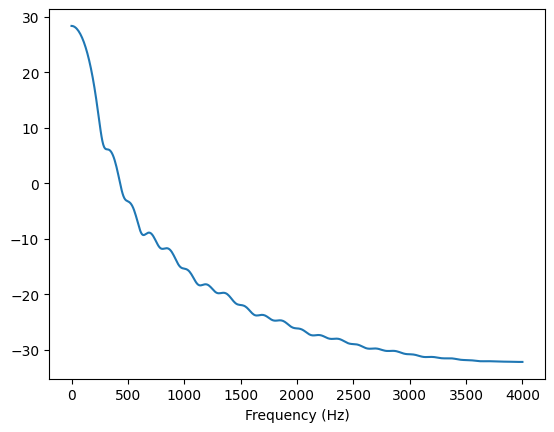

In [6]:
plt.close()
nFFT = 1024
G = np.fft.rfft(g,nFFT)
rangeS = np.arange(int(nFFT/2))
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.plot(frequency,20*np.log10(np.abs(G)))
plt.xlabel('Frequency (Hz)')

プログラム 4.5

(0.0, 35.0)

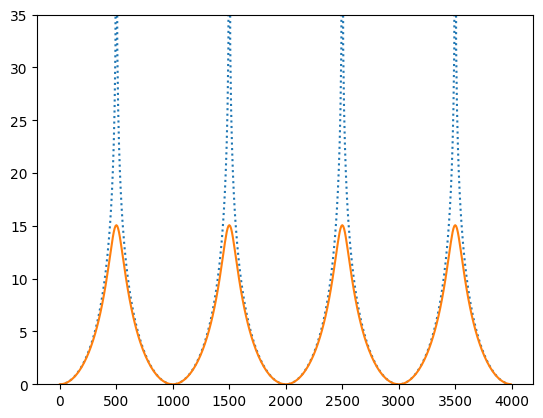

In [7]:
plt.close()
nFFT = 1024
b = np.zeros(5); b[4] = 2
a = np.zeros(9); a[[0, 8]] = 1
w, H = signal.freqz(b,a)
f = sr*w/(2*np.pi)
plt.plot(f,20*np.log10(np.abs(H)),':');

rG = 0.7; rL = 1
bLoss = np.zeros(5); bLoss[4] = 0.5*(1+rG)*(1+rL)
aLoss = np.zeros(9); aLoss[0] = 1; aLoss[8] = rL*rG
_, HLoss = signal.freqz(bLoss,aLoss)
plt.plot(f,20*np.log10(np.abs(HLoss)))
plt.ylim([0,35])

プログラム 4.6

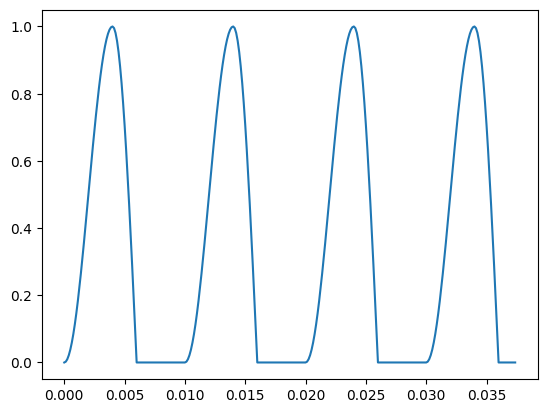

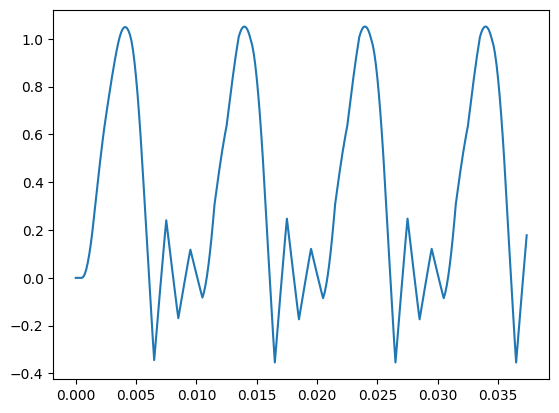

In [8]:
plt.close()
sr = 8000
duration = 0.01 # s
nImpulse = int(np.round(duration*sr))
impulse = np.zeros(nImpulse); impulse[0] = 1
xImpulse = np.matlib.repmat(impulse,1,int(1/duration))
t = np.arange(xImpulse.shape[1])/sr
r = np.arange(300)
IPython.display.display(IPython.display.Audio(xImpulse,rate=sr))
yGlottal = signal.lfilter(g,1,xImpulse)
plt.plot(t[r],yGlottal[0,r])
IPython.display.display(IPython.display.Audio(yGlottal,rate=sr))
yVowel = signal.lfilter(bLoss,aLoss,yGlottal)
plt.figure(); plt.plot(t[r],yVowel[0,r])
IPython.display.display(IPython.display.Audio(yVowel,rate=sr))

プログラム 4.7

In [9]:
sr = 8000

rG = 1; rL = 0.7
a1a2 = 1/7; L1L2 = 1
r1 = (1-a1a2)/(1+a1a2)

aA = np.zeros(9)
aA[0] = 1; aA[4] = r1*(rG+rL); aA[8] = rL*rG
formant = np.angle(np.roots(aA))/2/np.pi*sr
np.sort(formant[formant>0])

array([ 775.761874, 1224.238126, 2775.761874, 3224.238126])

プログラム 4.8

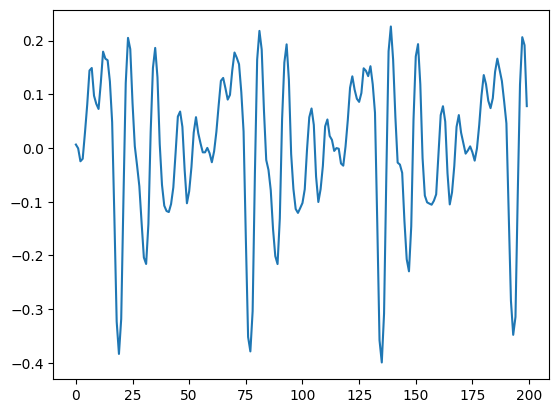

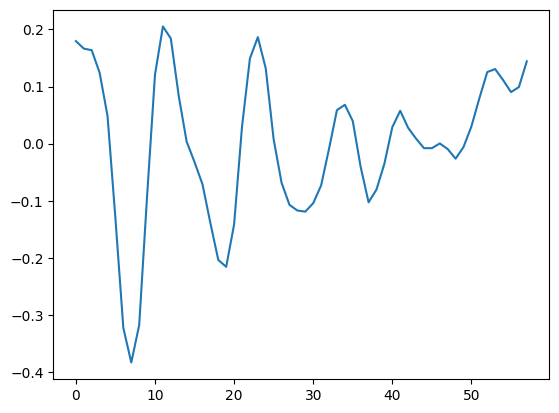

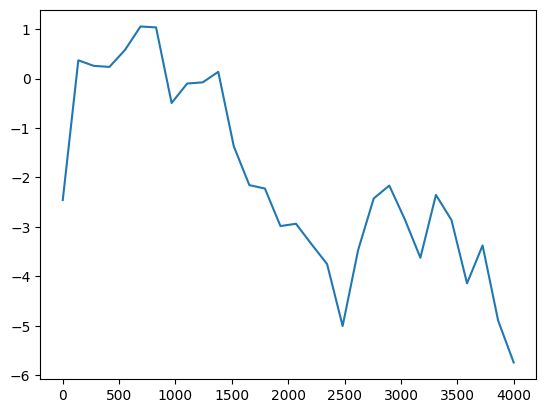

In [10]:
plt.close()
ySa, sr = librosa.load('sa48k.wav',sr=8000)
plt.plot(ySa[3200+np.arange(200)])
segment = ySa[3200+np.arange(12,70)]
plt.figure(); plt.plot(segment)
SA = np.fft.rfft(segment)
frequency = np.fft.rfftfreq(len(segment),1/sr)
plt.figure(); plt.plot(frequency, np.log(np.abs(SA)))

プログラム 4.10

In [11]:
def freqz_two_tube(f,rL,rG,r1,L,c,L1L2):
    return 0.5*(1+rG)*(1+rL)*(1*r1)*np.exp(-2j*np.pi*f*L/c)/ \
        (1+r1*rG*np.exp(-2j*np.pi*f*2*L1L2/(L1L2+1)*L/c)+ \
         r1*rL*np.exp(-2j*np.pi*f*2/(1+L1L2)*L/c)+ \
         rL*rG*np.exp(-2j*np.pi*f*2*L/c))

In [12]:
rG = 1; rL = 0.7
a1a2 = 27/73; L1L2 = 7/9
L = 0.17; c =340
r1 = (1-a1a2)/(1+a1a2)
f = np.arange(int(fs/2)+1)
Va = freqz_two_tube(f,rL,rG,r1,L,c,L1L2)

SGlottal = np.fft.rfft(yGlottal[0,:])
SA = SGlottal*Va
yA = np.fft.irfft(SA)
IPython.display.Audio(yA,rate=sr)